##Answer 1

**Fundamental Idea**

The fundamental idea of ensemble techniques is to combine multiple individual models (often called base learners or weak learners) to create a stronger and more accurate predictive model.


**Difference**

* Goal

Bagging reduces variance and prevent overfitting while Boosting reduces bias and improve model accuracy.

* Approach

Bagging trains multiple models independently on random subsets of data.Boosting trains models sequentially, each new model focuses on correcting errors of the previous one.

* Data Sampling

Bagging uses bootstrap samples (random sampling with replacement) and Boosting uses weighted sampling, giving more weight to misclassified samples.

##Answer 2

A **Single Decision** Tree tends to overfit the training data — it learns every small detail and noise, resulting in high variance and poor generalization on unseen data.

A **Random Forest Classifier**, however, is an ensemble of multiple decision trees, designed to reduce overfitting and improve accuracy through randomness and aggregation.


**Hyperparameter	Description Effect on Overfitting**

1. n_estimators

Number of trees in the forest	More trees → better averaging → lower variance (reduces overfitting)


2. max_features

Number of features considered when splitting a node	Smaller value → higher randomness → more diverse trees → less overfitting


3. max_depth

Maximum depth of each tree	Shallower trees → less complex → reduced overfitting

##Answer 3

**Stacking** (or Stacked Generalization) is an ensemble learning technique where we combine the predictions of multiple different models (called base learners) using another model (called a meta-learner) to make a final prediction.



**Simple Example Use Case**

Use Case: Loan Approval Prediction



You want to predict whether a loan should be approved (Yes or No) based on customer data such as income, age, credit score, and employment history.

* Base Models:

1. Decision Tree: Good at handling non-linear relationships

2. Logistic Regression: Good for linear patterns

3. K-Nearest Neighbors (KNN): Captures local similarities


* Meta-Model:

Random Forest or Logistic Regression: Learns how to weigh each base model’s prediction.

##Answer 4

The **OOB Score** (Out-of-Bag Score) is an internal validation accuracy estimate used in Random Forests.

**Why Usefull**

1. Built-in Cross-Validation:

The OOB score acts like a built-in validation test.

No need to split your data into a separate validation or test set.

2. Efficient Model Evaluation:

It provides an unbiased estimate of model performance because predictions are made on data not seen during training.

3. Saves Data:

Since Random Forest already uses bootstrapping, OOB evaluation comes “for free” without reducing the amount of training data.


**How It Works**

1. When training each tree, about 63% of the data points are selected (with replacement).
→ The remaining 37% of data points are OOB samples for that tree.


2. Each tree can make predictions only for its OOB samples (the ones it didn’t see during training).


3. After all trees are trained:

For each data point, collect predictions from all trees where it was OOB.

Compare these predictions to the true labels.

##Answer 5

Here’s a clear, point-by-point comparison of AdaBoost and Gradient Boosting;

1. How They Handle Errors from Weak Learners:

AdaBoost focuses more on misclassified samples by increasing their weights in the next iteration

Gradient Boosting focuses on residual errors (difference between actual and predicted values) — each new model tries to correct these residuals.

2. Weight Adjustment Mechanism:

For AdaBoost each training sample has a weight. Misclassified samples get higher weights; correctly classified ones get lower weights.  

For Gradient Boosting no explicit sample weights.Instead,the algorithm fits each new weak learner to the residuals (the gradient of the loss function).

3. Typical Use Cases:

AdaBoost is used in simpler problems, small-to-medium datasets, fewer noisy samples.

Gradient Boosting is used in complex datasets, large features, and tasks needing high accuracy.

##Answer 6

CatBoost (short for Categorical Boosting) is a gradient boosting algorithm developed by Yandex that’s specifically designed to handle categorical features efficiently — without requiring heavy preprocessing like one-hot encoding or label encoding.

**Reason How It Helps**

*Ordered Target Encoding* Learns category importance based on target values without leakage


*Automatic Feature* Combinations  Captures complex relationships between categorical variables


*No One-Hot Encoding Needed*  Reduces dimensionality and speeds up training
Ordered Boosting Scheme Prevents overfitting caused by target leakage

In [ ]:
##Answer 7

# 📘 KNN Classifier Assignment: Wine Dataset Analysis with Optimization

# Step 1: Import Libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the Wine Dataset
data = load_wine()
X = data.data
y = data.target

# Step 3: Split Data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Train KNN Classifier (K=5) WITHOUT Scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation Metrics
print("🔹 Results WITHOUT Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain KNN (K=5) WITH Scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluation Metrics (After Scaling)
print("\n🔹 Results WITH Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# Step 6: Optimization using GridSearchCV
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearch on Scaled Data
grid_search.fit(X_train_scaled, y_train)

# Best Parameters and Score
print("\n🔹 Best Parameters from GridSearchCV:")
print(grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 7: Evaluate Best Model on Test Data
best_knn = grid_search.best_estimator_
y_best_pred = best_knn.predict(X_test_scaled)

print("\n🔹 Final Evaluation with Optimized KNN:")
print("Accuracy:", accuracy_score(y_test, y_best_pred))
print("Classification Report:\n", classification_report(y_test, y_best_pred))

🔹 Results WITHOUT Scaling:
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


🔹 Results WITH Scaling:
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


🔹 Best Parameters from GridSearchCV:
{'metric': 'euclidean', 'n_neighbors': 11}

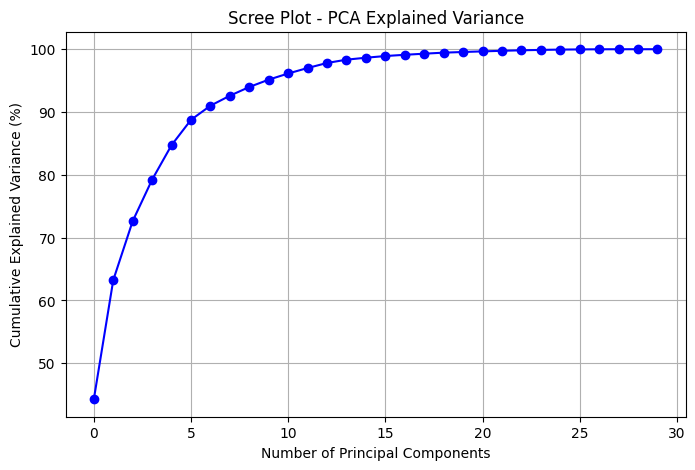

Number of components to retain 95% variance: 10

🔹 KNN Performance Comparison:
Accuracy on Original Data: 0.9708
Accuracy on PCA (95% variance) Data: 0.9474


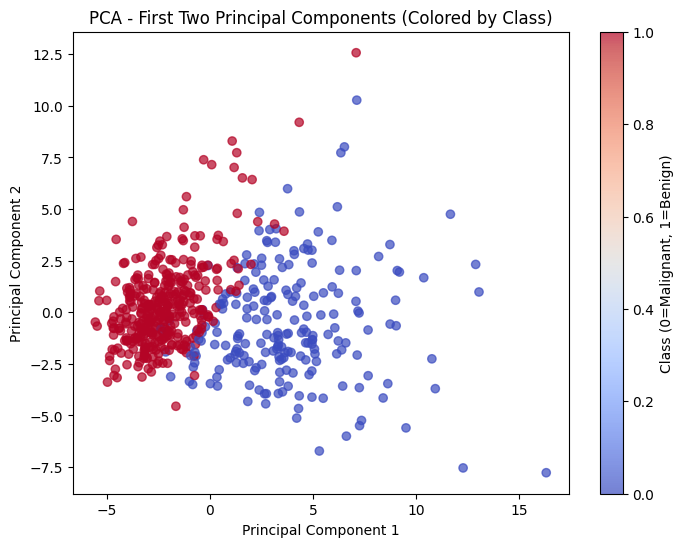

In [ ]:
##Answer 8

#  PCA + KNN with Variance Analysis and Visualization

# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Load the Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 3: Standardize the Data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA (no. of components = all)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Plot Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot - PCA Explained Variance')
plt.grid(True)
plt.show()

# Step 6: Retain 95% Variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"Number of components to retain 95% variance: {pca_95.n_components_}")

# Step 7: Split Train/Test Data (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca_95, y, test_size=0.3, random_state=42, stratify=y)

# Step 8: Train KNN on Original Data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# Step 9: Train KNN on PCA-Transformed Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Step 10: Compare Accuracies
print("\n🔹 KNN Performance Comparison:")
print(f"Accuracy on Original Data: {acc_original:.4f}")
print(f"Accuracy on PCA (95% variance) Data: {acc_pca:.4f}")

# Step 11: Visualization - First Two Principal Components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components (Colored by Class)')
plt.colorbar(label='Class (0=Malignant, 1=Benign)')
plt.show()

🔹 KNN Regression Comparison (K=5):
Mean Squared Error (Euclidean): 4989.2901
Mean Squared Error (Manhattan): 5558.4380


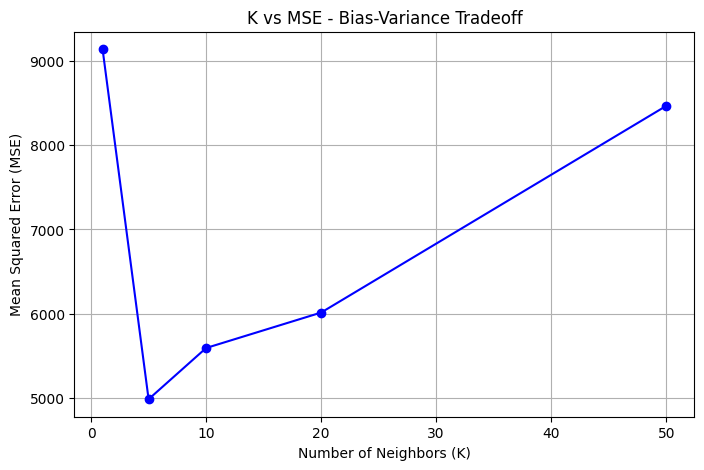


🔍 Interpretation:
• Lower K (e.g., K=1) → Low bias, High variance (overfitting).
• Higher K (e.g., K=50) → High bias, Low variance (underfitting).
• Optimal K gives the lowest MSE, balancing bias and variance.


In [ ]:
##Answer 9

# 📘 KNN Regressor with Distance Metrics and K-Value Analysis

# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 2: Generate Synthetic Regression Dataset
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# Step 3: Split into Train/Test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Apply Standard Scaling (KNN is distance-based)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5a: KNN Regressor with Euclidean Distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Step 5b: KNN Regressor with Manhattan Distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("🔹 KNN Regression Comparison (K=5):")
print(f"Mean Squared Error (Euclidean): {mse_euclidean:.4f}")
print(f"Mean Squared Error (Manhattan): {mse_manhattan:.4f}")

# Step 6: Analyze K vs MSE (Bias-Variance Tradeoff)
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Step 7: Plot K vs MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_values, marker='o', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K vs MSE - Bias-Variance Tradeoff')
plt.grid(True)
plt.show()

# Step 8: Interpretation
print("\n🔍 Interpretation:")
print("• Lower K (e.g., K=1) → Low bias, High variance (overfitting).")
print("• Higher K (e.g., K=50) → High bias, Low variance (underfitting).")
print("• Optimal K gives the lowest MSE, balancing bias and variance.")

🔹 Dataset loaded successfully.
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Ou

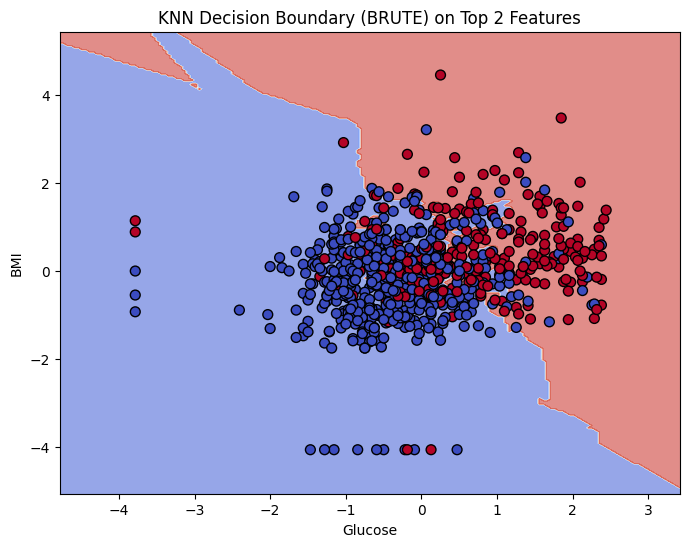

In [ ]:
##Answer 10

# KNN with KD-Tree / Ball Tree, Imputation, and Real-World Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif

# Step 1: Load Dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

print("🔹 Dataset loaded successfully.")
print(df.head(), "\n")
print("Missing values per column:\n", df.isna().sum())

# Step 2: Handle Missing Values using KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\n✅ Missing values imputed using KNNImputer.")
print(df_imputed.isna().sum())

# Step 3: Split features and target
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Step 4: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Compare KNN algorithms (brute, kd_tree, ball_tree)
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train, y_train)
    end = time.time()

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    train_time = end - start

    results[algo] = {'accuracy': acc, 'time': train_time}

# Step 7: Display comparison
print("\n🔹 KNN Algorithm Comparison:")
for algo, metrics in results.items():
    print(f"{algo.upper():<10} | Accuracy: {metrics['accuracy']:.4f} | Training Time: {metrics['time']:.4f} sec")

# Step 8: Choose best-performing algorithm
best_algo = max(results, key=lambda a: results[a]['accuracy'])
print(f"\n🏆 Best Performing Algorithm: {best_algo.upper()}")

# Step 9: Feature Importance (using Mutual Information)
mi = mutual_info_classif(X, y)
feature_importance = pd.Series(mi, index=df.columns[:-1]).sort_values(ascending=False)
top2_features = feature_importance.index[:2]
print("\n🔹 Top 2 Important Features:", list(top2_features))

# Step 10: Train model again using only top 2 features
X2 = df_imputed[top2_features]
X2_scaled = scaler.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y, test_size=0.3, random_state=42, stratify=y)

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X2_train, y2_train)

# Step 11: Plot Decision Boundary
x_min, x_max = X2_scaled[:, 0].min() - 1, X2_scaled[:, 0].max() + 1
y_min, y_max = X2_scaled[:, 1].min() - 1, X2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=50)
plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title(f"KNN Decision Boundary ({best_algo.upper()}) on Top 2 Features")
plt.show()